![](https://storage.needpix.com/rsynced_images/movie-64073_1280.jpg)

**Student**:  David O'Dell

**Course**:  Data Science with Python

**Project 2**:  Movielens Case Study, predictive modeling with logistic regression


**Tasks**:


* Import the three datasets

* Create a new dataset named "master_data" with the following columns (MovieID Title UserID Age Gender Occupation Rating)

* Explore the datasets using visual representations (graphs or tables), also include your comments on the following:


** User Age Distribution

** User rating of the movie “Toy Story”

** Top 25 movies by viewership rating

** Find the ratings for all the movies reviewed by for a particular user of user id = 2696


* Feature Engineering:

** Find out all unique genres 

** Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

** Determine the features affecting the ratings of any particular movie.

** Develop an appropriate model to predict the movie ratings

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/movielenssimplilearn/movies.dat
/kaggle/input/movielenssimplilearn/users.dat
/kaggle/input/movielenssimplilearn/ratings.dat


***

## Import the datasets

In [2]:
df_m = pd.read_csv("../input/movielenssimplilearn/movies.dat", engine='python', sep='::', names=["MovieID", "Title", "Genres"])

In [3]:
df_m.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_r = pd.read_csv("../input/movielenssimplilearn/ratings.dat", engine='python', sep='::', names=["UserID", "MovieID", "Rating", "Timestamp"])

In [5]:
df_r.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
df_u = pd.read_csv("../input/movielenssimplilearn/users.dat", engine='python', sep='::', names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])

In [7]:
df_u.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


***

## Merge the datasets into one

In [8]:
df_merged1 = df_m.merge(df_r, how='outer')

In [9]:
df_merged1.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,4.0,978237008.0
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,4.0,978233496.0
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,5.0,978225952.0
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,5.0,978226474.0


In [10]:
df_merged2 = df_u.merge(df_r, how='inner')

In [11]:
df_merged2.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [12]:
df_merged3 = df_merged1.merge(df_merged2, how='inner')

In [13]:
df_merged3.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,4.0,978237008.0,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,4.0,978233496.0,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,5.0,978225952.0,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,5.0,978226474.0,F,35,1,95370


In [14]:
df_merged3.UserID = df_merged3.UserID.astype(int)
df_merged3.Rating = df_merged3.Rating.astype(int)

In [15]:
df_merged3.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268.0,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008.0,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496.0,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952.0,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474.0,F,35,1,95370


In [16]:
df_merged3.shape

(1000209, 10)

In [17]:
df_merged3.sort_values(by=['UserID'], ascending=True)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268.0,F,1,10,48067
310576,1207,To Kill a Mockingbird (1962),Drama,1,4,978300719.0,F,1,10,48067
341051,1246,Dead Poets Society (1989),Drama,1,4,978302091.0,F,1,10,48067
745569,2762,"Sixth Sense, The (1999)",Thriller,1,4,978302091.0,F,1,10,48067
144754,531,"Secret Garden, The (1993)",Children's|Drama,1,4,978302149.0,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
835749,3108,"Fisher King, The (1991)",Comedy|Drama|Romance,6040,4,960971992.0,M,25,6,11106
149802,541,Blade Runner (1982),Film-Noir|Sci-Fi,6040,4,956715288.0,M,25,6,11106
917912,3505,No Way Out (1987),Thriller,6040,4,956704056.0,M,25,6,11106
881053,3334,Key Largo (1948),Crime|Drama|Film-Noir|Thriller,6040,5,960971875.0,M,25,6,11106


Let's rearrange the columns into something we prefer

In [18]:
cols = list(df_merged3.columns.values)

In [19]:
print(cols)

['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender', 'Age', 'Occupation', 'Zip-code']


***

## Create master data dataframe

In [20]:
master_data = df_merged3[['UserID', 'MovieID', 'Title', 'Rating', 'Genres', 'Zip-code', 'Gender', 'Age', 'Occupation', 'Timestamp']]

In [21]:
master_data.head()

,UserID,MovieID,Title,Rating,Genres,Zip-code,Gender,Age,Occupation,Timestamp
0,1,1,Toy Story (1995),5,Animation|Children's|Comedy,48067,F,1,10,978824268.0
1,6,1,Toy Story (1995),4,Animation|Children's|Comedy,55117,F,50,9,978237008.0
2,8,1,Toy Story (1995),4,Animation|Children's|Comedy,11413,M,25,12,978233496.0
3,9,1,Toy Story (1995),5,Animation|Children's|Comedy,61614,M,25,17,978225952.0
4,10,1,Toy Story (1995),5,Animation|Children's|Comedy,95370,F,35,1,978226474.0


In [22]:
master_data.sort_values(by=['MovieID'], ascending=True)

,UserID,MovieID,Title,Rating,Genres,Zip-code,Gender,Age,Occupation,Timestamp
0,1,1,Toy Story (1995),5,Animation|Children's|Comedy,48067,F,1,10,9.788243e+08
1394,4079,1,Toy Story (1995),4,Animation|Children's|Comedy,26505,M,35,17,9.654429e+08
1393,4077,1,Toy Story (1995),4,Animation|Children's|Comedy,22030,F,35,2,9.654457e+08
1392,4064,1,Toy Story (1995),5,Animation|Children's|Comedy,20851,M,45,0,9.654791e+08
1391,4063,1,Toy Story (1995),5,Animation|Children's|Comedy,29070,F,35,1,9.875664e+08
...,...,...,...,...,...,...,...,...,...,...
999944,1255,3952,"Contender, The (2000)",3,Drama|Thriller,94110,M,25,17,9.748220e+08
999943,1250,3952,"Contender, The (2000)",3,Drama|Thriller,10573,M,50,0,9.748405e+08
999942,1243,3952,"Contender, The (2000)",4,Drama|Thriller,92627,M,35,15,9.748538e+08
999964,1383,3952,"Contender, The (2000)",4,Drama|Thriller,19806,F,25,7,9.835805e+08


***

## View the distribution of user ages

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a808bc1d0>]],
      dtype=object)

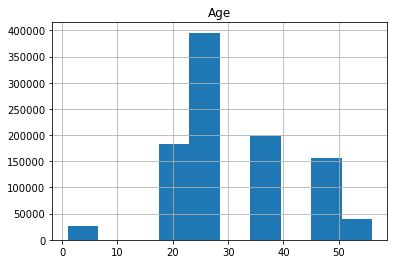

In [23]:
master_data.hist(column='Age')

In the user data set, we have ages mapped to categorical numbers using this table from the description of the dataset: 

**Value  	Description**

1  = "Under 18"

18 = "18-24"

25 = "25-34"

35 = "35-44"

45 = "45-49"

50 = "50-55"

56 = "56+"


Let's redraw our histogram based on our newly mapped bin values

In [24]:
bins_list = [1, 18, 25, 35, 45, 50, 56]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a80910d90>]],
      dtype=object)

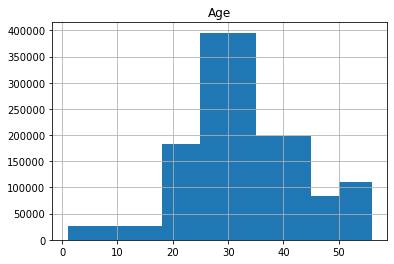

In [25]:
master_data.hist(column='Age', bins = bins_list)

***

## User rating on the movie Toy Story

Toy story is MovieID = 1, let's get a distribution of ratings on that single ID

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a80993910>]],
      dtype=object)

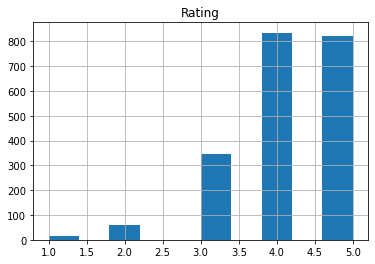

In [26]:
master_data[master_data['MovieID'] == 1].hist(column='Rating')

How many data points are we dealing with when we draw this histogram for Toy Story ratings

In [27]:
master_data[master_data['MovieID'] == 1].count()

UserID        2077
MovieID       2077
Title         2077
Rating        2077
Genres        2077
Zip-code      2077
Gender        2077
Age           2077
Occupation    2077
Timestamp     2077
dtype: int64

***

## Average rating of Toy Story

In [28]:
master_data[master_data['MovieID'] == 1].Rating.mean()

4.146846413095811

***

## Top 25 movies by rating of entire viewership

Let's sort the master data by rating

In [29]:
master_data.sort_values(by=['Rating'], ascending=False)

,UserID,MovieID,Title,Rating,Genres,Zip-code,Gender,Age,Occupation,Timestamp
0,1,1,Toy Story (1995),5,Animation|Children's|Comedy,48067,F,1,10,978824268.0
657724,101,2409,Rocky II (1979),5,Action|Drama,33314,F,18,3,977578472.0
244214,447,1012,Old Yeller (1957),5,Children's|Drama,55105,F,45,11,976236279.0
657745,549,2409,Rocky II (1979),5,Action|Drama,53217,M,25,6,976119207.0
657752,684,2409,Rocky II (1979),5,Action|Drama,27510,M,25,4,975603281.0
...,...,...,...,...,...,...,...,...,...,...
88980,1356,330,Tales from the Hood (1995),1,Comedy|Horror,91706,F,18,4,974771771.0
874229,1726,3274,Single White Female (1992),1,Action,60160,M,25,2,974711336.0
88982,1447,330,Tales from the Hood (1995),1,Comedy|Horror,80521,M,18,4,981017854.0
874220,1616,3274,Single White Female (1992),1,Action,16101,M,25,0,989848550.0


How many 5 star ratings are there?

In [30]:
master_data[master_data['Rating'] == 5].Rating.count()

226310

We need to find the unique users who rated movies at rating = 5

In [31]:
master_data[master_data['Rating'] == 5].Title.unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Tigerland (2000)', 'Two Family House (2000)',
       'Contender, The (2000)'], dtype=object)

Movies that had the most numerous ratings

In [32]:
most_rated = master_data.groupby('Title').size().sort_values(ascending=False)[:25]

In [33]:
most_rated

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

***

## Find the ratings for all the movies reviewed by for a particular user of user id = 2696


In [34]:
user2696 = master_data[master_data['UserID'] == 2696]

In [35]:
user2696.shape

(20, 10)

In [36]:
user2696

,UserID,MovieID,Title,Rating,Genres,Zip-code,Gender,Age,Occupation,Timestamp
95261,2696,350,"Client, The (1994)",3,Drama|Mystery|Thriller,24210,M,25,7,973308886.0
200536,2696,800,Lone Star (1996),5,Drama|Mystery,24210,M,25,7,973308842.0
270342,2696,1092,Basic Instinct (1992),4,Mystery|Thriller,24210,M,25,7,973308886.0
274576,2696,1097,E.T. the Extra-Terrestrial (1982),3,Children's|Drama|Fantasy|Sci-Fi,24210,M,25,7,973308690.0
349333,2696,1258,"Shining, The (1980)",4,Horror,24210,M,25,7,973308710.0
360382,2696,1270,Back to the Future (1985),2,Comedy|Sci-Fi,24210,M,25,7,973308676.0
448293,2696,1589,Cop Land (1997),3,Crime|Drama|Mystery,24210,M,25,7,973308865.0
457193,2696,1617,L.A. Confidential (1997),4,Crime|Film-Noir|Mystery|Thriller,24210,M,25,7,973308842.0
459835,2696,1625,"Game, The (1997)",4,Mystery|Thriller,24210,M,25,7,973308842.0
464473,2696,1644,I Know What You Did Last Summer (1997),2,Horror|Mystery|Thriller,24210,M,25,7,973308920.0


***

## Find out all the unique genres

split the genre content from pipe delimited to a list in a new column

In [37]:
master_data['Genres_list'] = master_data['Genres'].str.split('|')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
master_data.head()

,UserID,MovieID,Title,Rating,Genres,Zip-code,Gender,Age,Occupation,Timestamp,Genres_list
0,1,1,Toy Story (1995),5,Animation|Children's|Comedy,48067,F,1,10,978824268.0,"[Animation, Children's, Comedy]"
1,6,1,Toy Story (1995),4,Animation|Children's|Comedy,55117,F,50,9,978237008.0,"[Animation, Children's, Comedy]"
2,8,1,Toy Story (1995),4,Animation|Children's|Comedy,11413,M,25,12,978233496.0,"[Animation, Children's, Comedy]"
3,9,1,Toy Story (1995),5,Animation|Children's|Comedy,61614,M,25,17,978225952.0,"[Animation, Children's, Comedy]"
4,10,1,Toy Story (1995),5,Animation|Children's|Comedy,95370,F,35,1,978226474.0,"[Animation, Children's, Comedy]"


Convert M and F category to binary

In [39]:
master_data['Gender'].replace(['F','M'],[0,1],inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [40]:
master_data.head()

,UserID,MovieID,Title,Rating,Genres,Zip-code,Gender,Age,Occupation,Timestamp,Genres_list
0,1,1,Toy Story (1995),5,Animation|Children's|Comedy,48067,0,1,10,978824268.0,"[Animation, Children's, Comedy]"
1,6,1,Toy Story (1995),4,Animation|Children's|Comedy,55117,0,50,9,978237008.0,"[Animation, Children's, Comedy]"
2,8,1,Toy Story (1995),4,Animation|Children's|Comedy,11413,1,25,12,978233496.0,"[Animation, Children's, Comedy]"
3,9,1,Toy Story (1995),5,Animation|Children's|Comedy,61614,1,25,17,978225952.0,"[Animation, Children's, Comedy]"
4,10,1,Toy Story (1995),5,Animation|Children's|Comedy,95370,0,35,1,978226474.0,"[Animation, Children's, Comedy]"


***

## One hot encode Genre list into separate columns

In [41]:
from sklearn.preprocessing import MultiLabelBinarizer

## assign a new series to the genres_list column that contains a list of categories for each movie
list2series = pd.Series(master_data.Genres_list)

mlb = MultiLabelBinarizer()

## use mlb to create a new dataframe of the genres from the list for each row from the original data

one_hot_genres = pd.DataFrame(mlb.fit_transform(list2series),columns=mlb.classes_,index=list2series.index)


In [42]:
print(one_hot_genres.head())

   Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
0       0          0          1           1       1      0            0   
1       0          0          1           1       1      0            0   
2       0          0          1           1       1      0            0   
3       0          0          1           1       1      0            0   
4       0          0          1           1       1      0            0   

   Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
0      0        0          0       0        0        0        0       0   
1      0        0          0       0        0        0        0       0   
2      0        0          0       0        0        0        0       0   
3      0        0          0       0        0        0        0       0   
4      0        0          0       0        0        0        0       0   

   Thriller  War  Western  
0         0    0        0  
1         0    0        0  
2         0   

In [43]:
type(one_hot_genres)

pandas.core.frame.DataFrame

***

## Determine the features affecting the ratings of any particular movie.

Create a smaller features dataframe of the movie data features that are relevant to rating outcome:

- zip code
- gender
- age
- occupation


In [44]:
md_small = master_data.iloc[:, [1,3,5,6,7,8]]

In [45]:
md_small.head()

,MovieID,Rating,Zip-code,Gender,Age,Occupation
0,1,5,48067,0,1,10
1,1,4,55117,0,50,9
2,1,4,11413,1,25,12
3,1,5,61614,1,25,17
4,1,5,95370,0,35,1


Check the data types of the set

In [46]:
md_small.dtypes

MovieID        int64
Rating         int64
Zip-code      object
Gender         int64
Age            int64
Occupation     int64
dtype: object

change 'zip code' into numerical data type

In [47]:
md_small['Zip-code'] = md_small['Zip-code'].str[:5]
pd.to_numeric(md_small['Zip-code'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0          48067
1          55117
2          11413
3          61614
4          95370
           ...  
1000204    92120
1000205    92120
1000206    60607
1000207    10003
1000208    61820
Name: Zip-code, Length: 1000209, dtype: int64

In [48]:
## skip the correlation of movieID

md_small[md_small.columns[1:]].corr()['Rating'][:]

Rating        1.000000
Gender       -0.019861
Age           0.056869
Occupation    0.006753
Name: Rating, dtype: float64

We see that Age has the highest correlation

merge feature column with genre categories one hot list

In [49]:
master_features = pd.merge(md_small, one_hot_genres, left_index=True, right_index=True)

In [50]:
master_features.head()

,MovieID,Rating,Zip-code,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,5,48067,0,1,10,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,4,55117,0,50,9,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,4,11413,1,25,12,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,5,61614,1,25,17,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,5,95370,0,35,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


***

## Train model for linear regression

- pull all the columns to analyze exclude the Ratings column since this is our dependent variable
- let's drop the zip code and rating columns, zip code might not be worth the cycles at this point
- let's make a smaller dataset with only those relevant features

In [51]:
X_feature = md_small.drop(['Zip-code'], axis=1)

In [52]:
X_feature.head()

,MovieID,Rating,Gender,Age,Occupation
0,1,5,0,1,10
1,1,4,0,50,9
2,1,4,1,25,12
3,1,5,1,25,17
4,1,5,0,35,1


Since we're dealing with a large dataset, let's just train and test on a smaller portion of the dataset.  Let's grab only the first 50 unique movie IDs.  We have to make sure both our X and Y vectors are the same number of rows.

In [53]:
X_feature_small = X_feature[X_feature['MovieID'] < 50] 

The training data need only include the features we feel would influence the outcome of the movie rating.  

I have chosen that Occupation, Age and Gender are the most influential.

We will get rid of the MovieID and Rating column as this will conflict with our regression

In [54]:
X_feature_small_trimmed = X_feature_small.drop(['MovieID','Rating'], axis=1)

In [55]:
X_feature_small_trimmed.shape

(23302, 3)

In [56]:
X_feature_small_trimmed.head()

,Gender,Age,Occupation
0,0,1,10
1,0,50,9
2,1,25,12
3,1,25,17
4,0,35,1


The target feature we are trying to predict is the dependent variable, in other words the 'y' of the linear equation.  

In this case our target is the Rating feature.

In [57]:
Y_target = master_features['Rating'][master_features['MovieID']< 50]

In [58]:
Y_target.shape

(23302,)

***

### Develop an appropriate model to predict the movie ratings

Split the data into training and testing data.  By default this is 75% training and 25% testing

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_feature_small_trimmed,Y_target,random_state=1)

In [60]:
from sklearn.linear_model import LogisticRegression

Logistic regression is best used for predicting categorical data

need to do logistic regression on the training data so we can see how well our test data does the prediction

The dataset kept throwing off a non-convergence error where max iterations had been reached.  I used the code below to increase the max iter.

In [61]:
#logreg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=100000)
logreg = LogisticRegression(max_iter=100000)

In [62]:
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

Let's predict the outcome based on test set

In [63]:
y_pred = logreg.predict(x_test)

let's get the accuracy score of the test data

In [64]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.36611740473738413

In [65]:
# print the first 30 true and predicted responses
print ('actual:    ', y_test.values[0:30])
print ('predicted: ', y_pred[0:30])

actual:     [4 4 4 5 2 4 4 3 3 2 4 3 5 3 4 5 3 4 3 5 5 5 1 3 1 5 4 3 3 4]
predicted:  [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


***

### Summary

- The best accuracy score was 36.6% reached with 23302 rows corresponding to 50 movies being evaluated

- Relative to the best score, a decrease in accuracy to 35% was observed when 25 movies were evaluated corresponding to 12476 rows.

- Relative to the best score, a decrease in accuracy to 34% was observed when 100 movies were evaluated corresponding to 32244 rows.

* - These observations remained the same when including or excluding "Occupation" and "Gender" as these two features had the least influence on the outcome.
